# Random Forest Analysis

## What Features are important in predicting third down conversion 

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn import tree

In [40]:
df = pd.read_csv("thirdDown.csv")

df = df.drop(columns=['pass_length.1', 'Unnamed: 0'])

df.head()



,play_id,game_id,shotgun,no_huddle,ydstogo,yardline_100,play_type,half_seconds_remaining,down,pass_length,run_location,score_differential,fg_prob,td_prob,ep,third_down_converted
0,190,2018090600,1,0,10,39.0,pass,1681.0,3.0,deep,NaN,0.0,0.415009,0.333712,2.250232,1.0
1,256,2018090600,1,0,1,1.0,pass,1559.0,3.0,short,NaN,0.0,0.204515,0.749825,5.661931,0.0
2,344,2018090600,1,0,4,92.0,pass,1464.0,3.0,short,NaN,0.0,0.093928,0.213978,-1.832560,0.0
3,445,2018090600,1,0,5,39.0,run,1404.0,3.0,NaN,right,0.0,0.395592,0.377457,2.642543,1.0
4,636,2018090600,1,0,3,3.0,pass,1207.0,3.0,short,NaN,0.0,0.386222,0.567801,4.926552,0.0


#### Data preprocessing, change categorical values to numeric

In [41]:
df = pd.get_dummies(df) 
df.head()

,play_id,game_id,shotgun,no_huddle,ydstogo,yardline_100,half_seconds_remaining,down,score_differential,fg_prob,td_prob,ep,third_down_converted,play_type_pass,play_type_run,pass_length_deep,pass_length_short,run_location_left,run_location_middle,run_location_right
0,190,2018090600,1,0,10,39.0,1681.0,3.0,0.0,0.415009,0.333712,2.250232,1.0,1,0,1,0,0,0,0
1,256,2018090600,1,0,1,1.0,1559.0,3.0,0.0,0.204515,0.749825,5.661931,0.0,1,0,0,1,0,0,0
2,344,2018090600,1,0,4,92.0,1464.0,3.0,0.0,0.093928,0.213978,-1.832560,0.0,1,0,0,1,0,0,0
3,445,2018090600,1,0,5,39.0,1404.0,3.0,0.0,0.395592,0.377457,2.642543,1.0,0,1,0,0,0,0,1
4,636,2018090600,1,0,3,3.0,1207.0,3.0,0.0,0.386222,0.567801,4.926552,0.0,1,0,0,1,0,0,0


In [42]:
target = df['third_down_converted']
target_names = ["not_converted", "converted"]


In [43]:
data = df.drop(['third_down_converted', 'play_id', 'game_id'], axis=1)
feature_names = data.columns
data = np.array(data)


#### Test/Train split

In [44]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size =0.25, random_state=42)


#### Descision Tree and Random Forest Models

In [45]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6069112627986348

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6408703071672355

In [49]:
# Listing feature importance weighting
feature_imp = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)
feature_imp

td_prob                   0.162392
half_seconds_remaining    0.147252
fg_prob                   0.147167
ep                        0.146907
score_differential        0.114618
ydstogo                   0.107825
yardline_100              0.088013
pass_length_short         0.024889
pass_length_deep          0.017620
shotgun                   0.010621
no_huddle                 0.008471
play_type_pass            0.006873
play_type_run             0.006854
run_location_left         0.003574
run_location_middle       0.003540
run_location_right        0.003384
down                      0.000000
dtype: float64

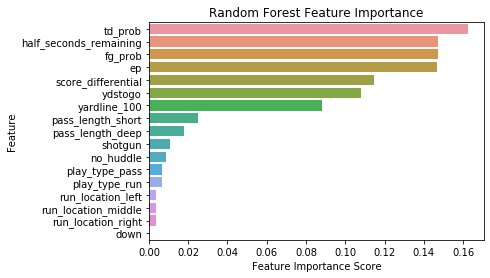

In [48]:
# Charting feature impartance
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")

plt.show()

## What Features are important in predicting whether a run or pass play 

In [3]:
df2 = pd.read_csv("thirdDown.csv")
df2 = df2.drop(columns=['pass_length.1', 'Unnamed: 0'])

df2.head()


,play_id,game_id,shotgun,no_huddle,ydstogo,yardline_100,play_type,half_seconds_remaining,down,pass_length,run_location,score_differential,fg_prob,td_prob,ep,third_down_converted
0,190,2018090600,1,0,10,39.0,pass,1681.0,3.0,deep,NaN,0.0,0.415009,0.333712,2.250232,1.0
1,256,2018090600,1,0,1,1.0,pass,1559.0,3.0,short,NaN,0.0,0.204515,0.749825,5.661931,0.0
2,344,2018090600,1,0,4,92.0,pass,1464.0,3.0,short,NaN,0.0,0.093928,0.213978,-1.832560,0.0
3,445,2018090600,1,0,5,39.0,run,1404.0,3.0,NaN,right,0.0,0.395592,0.377457,2.642543,1.0
4,636,2018090600,1,0,3,3.0,pass,1207.0,3.0,short,NaN,0.0,0.386222,0.567801,4.926552,0.0


#### Data preprocessing 

In [4]:
#Encode Play Type so that the column contains numerical codes.
from sklearn.preprocessing import LabelEncoder
le_play_type = LabelEncoder()





In [5]:
df2['play_type_n'] = le_play_type.fit_transform(df2['play_type'])


                                                
list(df2.columns)

['play_id',
 'game_id',
 'shotgun',
 'no_huddle',
 'ydstogo',
 'yardline_100',
 'play_type',
 'half_seconds_remaining',
 'down',
 'pass_length',
 'run_location',
 'score_differential',
 'fg_prob',
 'td_prob',
 'ep',
 'third_down_converted',
 'play_type_n']

In [29]:
# Set features and label to predit
features = df2.drop(['play_type_n', 'play_id', 'game_id', 'pass_length', 'run_location', 'play_type'], axis=1)
feature_names2 = features.columns
# features = np.array(features)
feature_names2



Index(['shotgun', 'no_huddle', 'ydstogo', 'yardline_100',
       'half_seconds_remaining', 'down', 'score_differential', 'fg_prob',
       'td_prob', 'ep', 'third_down_converted'],
      dtype='object')

In [12]:
label = df2['play_type_n']

#### Test/Train split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size =0.30, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators=300)
rf2.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
rf2.score(X_test, y_test)

0.8513225255972696

In [22]:
y_predicted = rf2.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[10614,   592],
       [ 1499,  1359]], dtype=int64)

#### Confusion Matrix


Text(69.0, 0.5, 'Truth')

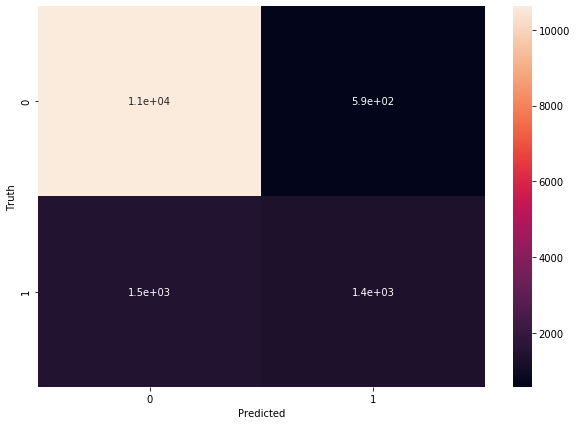

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
feature_imp2 = pd.Series(rf2.feature_importances_, index=feature_names2).sort_values(ascending=False)
feature_imp2

td_prob                   0.159095
ydstogo                   0.145652
half_seconds_remaining    0.130381
shotgun                   0.127597
ep                        0.124250
fg_prob                   0.122621
score_differential        0.096331
yardline_100              0.073799
third_down_converted      0.013725
no_huddle                 0.006549
down                      0.000000
dtype: float64

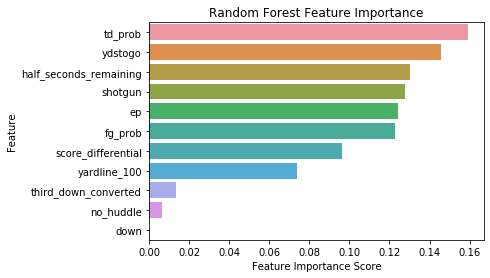

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plot = sns.barplot(x=feature_imp2, y=feature_imp2.index)

plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.savefig('passRun-feature-imp.png')
plt.show()